In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
df_customer = pd.read_csv('data/ecommerce_customer_data_large.csv')

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [4]:
df_customer.shape

(250000, 13)

In [5]:
df_customer.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [6]:
df_customer.duplicated().sum()

np.int64(0)

In [7]:
df_customer.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [8]:
df_customer['Returns'].value_counts()

Returns
1.0    101476
0.0    101142
Name: count, dtype: int64

In [9]:
# It looked like the Returns are evenly distributed because the data is artifically generated, so I should probably keep this pattern by using probabilistic imputation.
def prob_impute(s):
    s = s.copy()
        
    num_null = s.isna().sum()
    
    fill_values = np.random.choice(s.dropna(), num_null)
    
    s[s.isna()] = fill_values
    return s

In [10]:
df_customer['Returns'] = (
    df_customer
    ['Returns']
    .transform(prob_impute)
)

In [11]:
df_customer['Returns'].value_counts()

Returns
1.0    125142
0.0    124858
Name: count, dtype: int64

In [12]:
#Get list of categorical variables
s = (df_customer.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']


In [13]:
df_customer.isnull().any()

Customer ID              False
Purchase Date            False
Product Category         False
Product Price            False
Quantity                 False
Total Purchase Amount    False
Payment Method           False
Customer Age             False
Returns                  False
Customer Name            False
Age                      False
Gender                   False
Churn                    False
dtype: bool

In [14]:
df_customer['Purchase Date']

0         2023-05-03 21:30:02
1         2021-05-16 13:57:44
2         2020-07-13 06:16:57
3         2023-01-17 13:14:36
4         2021-05-01 11:29:27
                 ...         
249995    2023-01-24 12:32:18
249996    2021-06-04 05:45:25
249997    2022-11-10 17:11:57
249998    2021-06-27 14:42:12
249999    2020-09-07 05:12:19
Name: Purchase Date, Length: 250000, dtype: object

In [15]:
print("The newest customer's Purchase date in the records:", max(df_customer['Purchase Date']))
print("The oldest customer's Purchase date in the records:", min(df_customer['Purchase Date']))

The newest customer's Purchase date in the records: 2023-09-13 18:42:49
The oldest customer's Purchase date in the records: 2020-01-01 00:07:26


In [16]:
df_customer = df_customer.rename(columns={'Purchase Date': 'Purchase_Date', 'Customer ID': 'Customer_ID', 'Total Purchase Amount': 'Total_Purchase_Amount', 
                                          'Product Category': 'Product_Category', 'Product Price': 'Product_Price', 'Payment Method': 'Payment_Method', 
                                          'Customer Age': 'Customer_Age', 'Customer Name': 'Customer_Name'   
                                         })

In [17]:
df_customer['Purchase_Date'] = pd.to_datetime(df_customer['Purchase_Date'])

In [18]:
df_customer.head()

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,Returns,Customer_Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [19]:
today_date = pd.to_datetime('2024-01-01')

In [20]:
df_customer.head()

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,Returns,Customer_Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [21]:
df_customer['Season'] = df_customer['Purchase_Date'].apply(lambda x: 'Winter' if x.month in (12, 1, 2) else 'Spring' if x.month in (3, 4, 5) else 'Summer' if x.month in (6, 7, 8) else 'Fall')

In [22]:
# Dropping customer name because it isn't needed and should be kept private in a real world setting
# Dropped customer_age because there was already an age column
df_customer = df_customer.drop(columns=['Customer_Age', 'Customer_Name'])

In [23]:
df_customer.columns

Index(['Customer_ID', 'Purchase_Date', 'Product_Category', 'Product_Price',
       'Quantity', 'Total_Purchase_Amount', 'Payment_Method', 'Returns', 'Age',
       'Gender', 'Churn', 'Season'],
      dtype='object')

In [24]:
df_customer.head()

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Returns,Age,Gender,Churn,Season
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,31,Female,0,Spring
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,31,Female,0,Spring
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,31,Female,0,Summer
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,31,Female,0,Winter
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,31,Female,0,Spring


In [25]:
#Get list of Numerical variables
s = (df_customer.select_dtypes(include='number'))

print("Numerical variables in the dataset:", list(s.columns))

Numerical variables in the dataset: ['Customer_ID', 'Product_Price', 'Quantity', 'Total_Purchase_Amount', 'Returns', 'Age', 'Churn']


In [26]:
#Get list of categorical variables
s = (df_customer.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Product_Category', 'Payment_Method', 'Gender', 'Season']


# EDA

In [27]:
df_customer[['Product_Price', 'Quantity', 'Total_Purchase_Amount', 'Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Price,250000.0,254.742724,141.738104,10.0,132.0,255.0,377.0,500.0
Quantity,250000.0,3.004936,1.414737,1.0,2.0,3.0,4.0,5.0
Total_Purchase_Amount,250000.0,2725.385196,1442.576095,100.0,1476.0,2725.0,3975.0,5350.0
Age,250000.0,43.798276,15.364915,18.0,30.0,44.0,57.0,70.0


In [28]:
df_customer.head()

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Returns,Age,Gender,Churn,Season
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,31,Female,0,Spring
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,31,Female,0,Spring
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,31,Female,0,Summer
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,31,Female,0,Winter
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,31,Female,0,Spring


The data within this dataset was artificially generated, which made the visualizations less fun to look at and made everything even.

Product_Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64


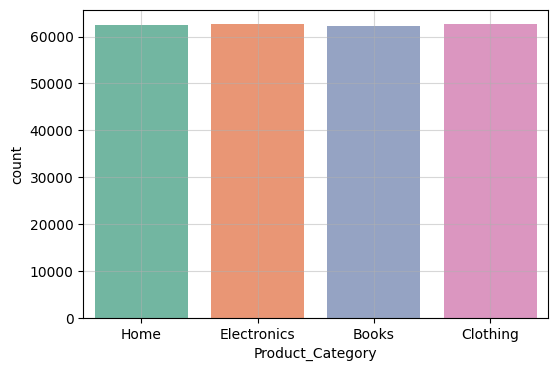

In [29]:
print(df_customer['Product_Category'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x = df_customer['Product_Category'], palette='Set2', hue=df_customer['Product_Category'], legend=False)
plt.grid(alpha=0.5)
plt.show()

Payment_Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64


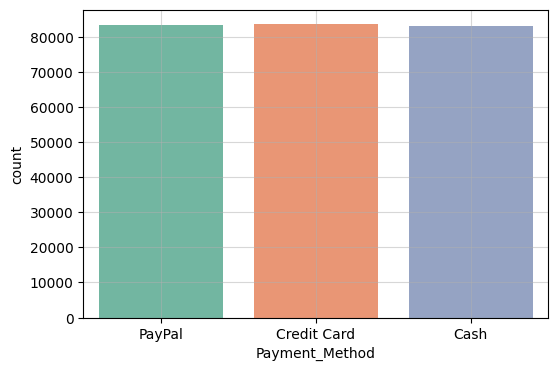

In [30]:
print(df_customer['Payment_Method'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x = df_customer['Payment_Method'], palette='Set2', hue=df_customer['Payment_Method'], legend=False)
plt.grid(alpha=0.5)
plt.show()

Season
Summer    68325
Spring    67970
Winter    60997
Fall      52708
Name: count, dtype: int64


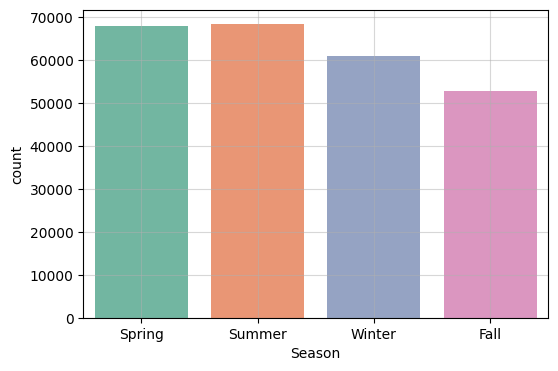

In [31]:
print(df_customer['Season'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x = df_customer['Season'], palette='Set2', hue=df_customer['Season'], legend=False)
plt.grid(alpha=0.5)
plt.show()

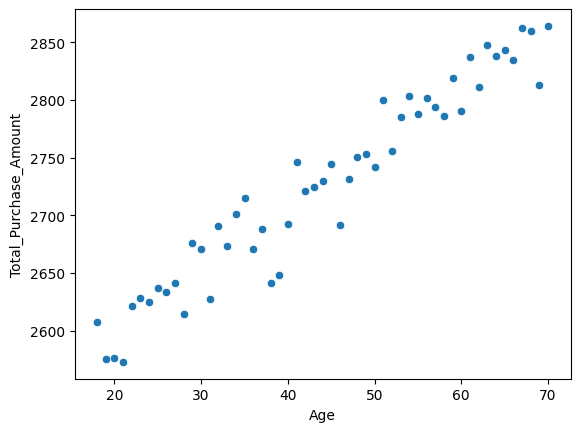

In [32]:
sns.scatterplot(data=df_customer.groupby('Age', as_index=False)['Total_Purchase_Amount'].mean(), x='Age', y='Total_Purchase_Amount');

# RFM Analysis

In [33]:
df_customer['Purchase_Date'].max()

Timestamp('2023-09-13 18:42:49')

In [34]:
today_date = pd.to_datetime('2024-01-01')

In [35]:
rfm_dataset = df_customer.groupby('Customer_ID').agg({'Purchase_Date': lambda Purchase_Date: (today_date - Purchase_Date.max()).days,
                                     'Customer_ID': 'count',
                                     'Total_Purchase_Amount': 'sum'})
rfm_dataset

,Purchase_Date,Customer_ID,Total_Purchase_Amount
Customer_ID,,,
1,397,3,6290
2,181,6,16481
3,331,4,9423
4,550,5,7826
5,533,5,9769
...,...,...,...
49996,468,7,24034
49997,497,2,5714
49998,122,10,20495


In [36]:
rfm_dataset = rfm_dataset.rename(columns={'Purchase_Date': 'Recency', 'Customer_ID': 'Frequency', 'Total_Purchase_Amount': 'Monetary'})

In [37]:
rfm_dataset

,Recency,Frequency,Monetary
Customer_ID,,,
1,397,3,6290
2,181,6,16481
3,331,4,9423
4,550,5,7826
5,533,5,9769
...,...,...,...
49996,468,7,24034
49997,497,2,5714
49998,122,10,20495


In [38]:
rfm_dataset["Recency_Score"] = pd.qcut(rfm_dataset['Recency'], q=5, labels=range(5, 0, -1))
rfm_dataset["Frequency_Score"] = pd.qcut(rfm_dataset['Frequency'], q=5, labels=range(1, 6))
rfm_dataset["Monetary_Score"] = pd.qcut(rfm_dataset['Monetary'], q=5, labels=range(1, 6))

rfm_dataset.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
Customer_ID,,,,,,
1,397,3,6290,2,1,1
2,181,6,16481,4,4,4
3,331,4,9423,3,2,2
4,550,5,7826,1,3,2
5,533,5,9769,2,3,2


In [39]:
rfm_dataset['RFM_Group'] = rfm_dataset[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
rfm_dataset['RFM_Score_Total'] = rfm_dataset[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].sum(axis=1)

In [40]:
rfm_dataset.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Group,RFM_Score_Total
Customer_ID,,,,,,,,
1,397,3,6290,2,1,1,2-1-1,4
2,181,6,16481,4,4,4,4-4-4,12
3,331,4,9423,3,2,2,3-2-2,7
4,550,5,7826,1,3,2,1-3-2,6
5,533,5,9769,2,3,2,2-3-2,7


In [41]:
def map_rfm_group(group):
    for pattern, label in segment_map.items():
        if re.match(pattern, group):  # Match using regex
            return label
    return np.nan  # Return NaN if no match is found

In [42]:
import re

In [43]:
segment_map = {
    r'5-5-5': 'Champions',  # Perfect score, top customers
    r'[4-5]-[4-5]-[3-5]': 'Loyal Customers',  # High R, F, and M
    r'[4-5]-[1-3]-[1-3]': 'At Risk Customers',  # High R, low F and M
    r'[3-5]-[4-5]-[1-3]': 'Potential Loyalists',  # Decent R, high F, low M
    r'[3-5]-[1-3]-[4-5]': 'Big Spenders',  # Decent R, low F, high M
    r'[1-3]-[2-3]-[2-3]': 'Need Attention',  # Moderate across the board
    r'[1-2]-[1-2]-[1-3]': 'Hibernating Customers',  # Low across the board
    r'[3-4]-[2-3]-[2-3]': 'Occasional Customers',  # Decent R, moderate F and M
    r'[4-5]-[1-3]-[4-5]': 'High Potential',  # Strong R and M, low F
    r'[1-3]-[4-5]-[4-5]': 'Ex-Loyal Customers',  # High F and M, low R
    r'[3-5]-[3-5]-[3-5]': 'High Value Customers',  # Balanced high scores
    r'[3-5]-[1-3]-[1-3]': 'Recent Customers',  # Decent R, low F and M
    r'[1-3]-[3-5]-[1-3]': 'Promising Customers',  # Low R, high F, low M
    r'[1-3]-[1-3]-[4-5]': 'Big Spenders (Low Loyalty)',  # High M, low R and F
    r'.*': 'Other',  # Catch-all for unmatched values
}

In [44]:
rfm_dataset['labels'] = rfm_dataset['RFM_Group'].apply(map_rfm_group)

In [45]:
rfm_dataset['labels'].isna().sum()

np.int64(0)

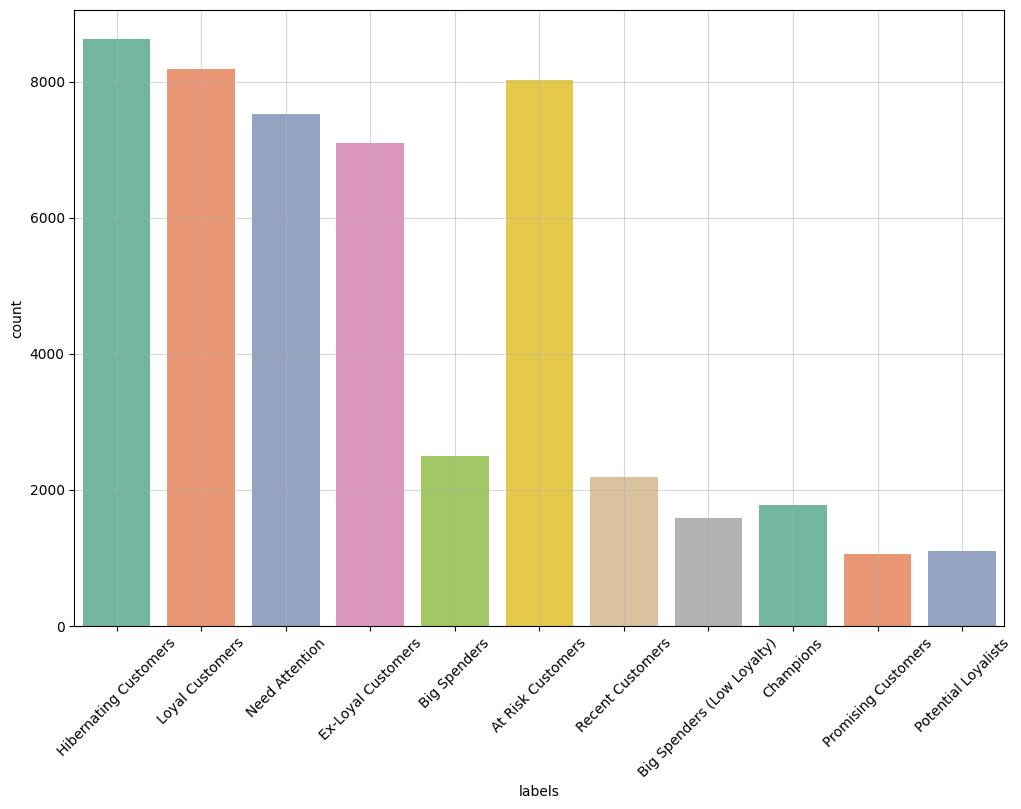

In [46]:
plt.figure(figsize=(12, 8))  
sns.countplot(x = rfm_dataset['labels'], palette='Set2', hue=rfm_dataset['labels'], legend=False)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

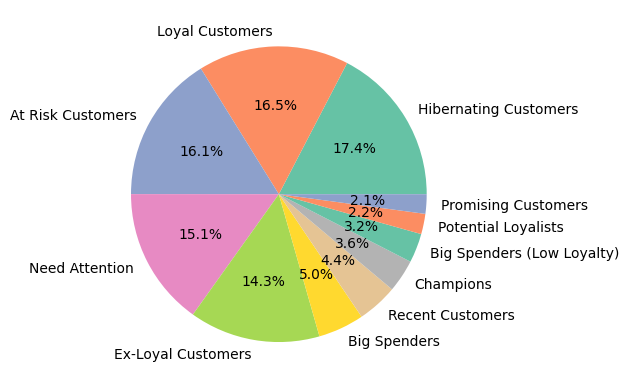

In [47]:
plt.pie(rfm_dataset['labels'].value_counts(), labels=rfm_dataset['labels'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'));

# Feature Engineering

### RFM Features

In [48]:
rfm = df_customer.groupby('Customer_ID').agg({'Purchase_Date': lambda Purchase_Date: (today_date - Purchase_Date.max()).days,
                                     'Customer_ID': 'count',
                                     'Total_Purchase_Amount': 'sum'})

In [49]:
rfm = rfm.rename(columns={'Customer_ID': 'Total_Transactions'})

In [50]:
rfm['Total_Products'] = df_customer.groupby('Customer_ID')['Quantity'].sum()

In [51]:
rfm['Average_Transaction'] = rfm['Total_Purchase_Amount'] / rfm['Total_Transactions']

In [52]:
rfm['Average_Quantity_Per_Transaction'] = rfm['Total_Products'] / rfm['Total_Transactions']

In [53]:
rfm['Age'] = df_customer.groupby('Customer_ID')['Age'].apply(lambda x: x.iloc[0])

In [54]:
rfm['Gender'] = df_customer.groupby('Customer_ID')['Gender'].apply(lambda x: x.iloc[0])

In [55]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender
Customer_ID,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female
2,181,6,16481,18,2746.833333,3.00,42,Female
3,331,4,9423,15,2355.750000,3.75,31,Male
4,550,5,7826,19,1565.200000,3.80,37,Male
5,533,5,9769,13,1953.800000,2.60,24,Female


### Category Features

In [56]:
rfm['Category_Diversity'] = df_customer.groupby('Customer_ID')['Product_Category'].nunique()

In [57]:
favorite_category = df_customer.groupby(['Customer_ID', 'Product_Category']).size().reset_index(name='Count')

In [58]:
favorite_category.groupby('Customer_ID')['Count'].idxmax()

Customer_ID
1             0
2             5
3             8
4            10
5            15
          ...  
49996    142608
49997    142611
49998    142613
49999    142616
50000    142621
Name: Count, Length: 49661, dtype: int64

In [59]:
favorite_category = favorite_category.loc[favorite_category.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Product_Category']].set_index('Customer_ID')

In [60]:
rfm['Favorite_Category'] = favorite_category

### Return Features

In [61]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category
Customer_ID,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home


In [62]:
rfm['Total_Return'] = df_customer.groupby('Customer_ID')['Returns'].sum()

In [63]:
rfm['Return_Rate'] = rfm['Total_Return'] / rfm['Total_Products']

### Behavioral Features

In [64]:
df_customer['Hour'] = df_customer['Purchase_Date'].dt.hour

In [65]:
favorite_hour = df_customer.groupby(['Customer_ID', 'Hour']).size().reset_index(name='Count')

In [66]:
favorite_hour.loc[favorite_hour.groupby('Customer_ID')['Count'].idxmax()]

,Customer_ID,Hour,Count
0,1,6,1
3,2,2,1
9,3,0,1
13,4,1,1
18,5,4,1
...,...,...,...
225664,49996,14,2
225666,49997,12,1
225669,49998,10,3
225679,49999,15,2


In [67]:
favorite_hour = favorite_hour.loc[favorite_hour.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Hour']]

In [68]:
favorite_hour = favorite_hour.set_index('Customer_ID')

In [69]:
rfm['Favorite_Hour'] = favorite_hour

In [70]:
df_customer['Day'] = df_customer['Purchase_Date'].dt.dayofweek

In [71]:
favorite_day = df_customer.groupby(['Customer_ID', 'Day']).size().reset_index(name='Count')

In [72]:
favorite_day = favorite_day.loc[favorite_day.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Day']].set_index('Customer_ID')

In [73]:
rfm['Favorite_Day'] = favorite_day

In [74]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day
Customer_ID,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2


### Spending Trends

In [75]:
favorite_season = df_customer.groupby(['Customer_ID', 'Season']).size().reset_index(name='Count')

In [76]:
favorite_season = favorite_season.loc[favorite_season.groupby('Customer_ID')['Count'].idxmax()][['Customer_ID', 'Season']].set_index('Customer_ID')

In [77]:
rfm['Favorite_Season'] = favorite_season

In [78]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season
Customer_ID,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring


In [79]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season
Customer_ID,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring


# Create Pipeline

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [81]:
s = (rfm.select_dtypes(include='number'))

print("Numerical variables in the dataset:", list(s.columns))

Numerical variables in the dataset: ['Purchase_Date', 'Total_Transactions', 'Total_Purchase_Amount', 'Total_Products', 'Average_Transaction', 'Average_Quantity_Per_Transaction', 'Age', 'Category_Diversity', 'Total_Return', 'Return_Rate', 'Favorite_Hour', 'Favorite_Day']


In [82]:
#Get list of categorical variables
s = (rfm.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Gender', 'Favorite_Category', 'Favorite_Season']


In [83]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season
Customer_ID,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring


### Identifying Outliers

In [89]:
from sklearn.ensemble import IsolationForest

In [90]:
rfm.isna().sum()

Purchase_Date                       0
Total_Transactions                  0
Total_Purchase_Amount               0
Total_Products                      0
Average_Transaction                 0
Average_Quantity_Per_Transaction    0
Age                                 0
Gender                              0
Category_Diversity                  0
Favorite_Category                   0
Total_Return                        0
Return_Rate                         0
Favorite_Hour                       0
Favorite_Day                        0
Favorite_Season                     0
dtype: int64

In [91]:
preproc = ColumnTransformer(
        transformers=[
            ('standard', StandardScaler(),  ['Purchase_Date', 'Total_Transactions', 'Total_Purchase_Amount', 'Total_Products', 'Average_Transaction', 'Average_Quantity_Per_Transaction', 'Age', 'Category_Diversity', 'Total_Return', 'Return_Rate', 'Favorite_Hour','Favorite_Day']),
            ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), ['Gender', 'Favorite_Category', 'Favorite_Season'])
        ],
        remainder='passthrough' 
        )

In [92]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
pl = Pipeline([
        ('preprocessor', preproc),
        ('isoforest', IsolationForest(contamination=0.05, random_state=0))
    ])

In [93]:
transformed_data = preproc.fit_transform(rfm)

In [94]:
# Step 2: Get Feature Names
# For OneHotEncoder, fetch feature names directly
ohe_feature_names = preproc.named_transformers_['ohe'].get_feature_names_out(['Gender', 'Favorite_Category', 'Favorite_Season'])

# Combine the names from StandardScaler, OneHotEncoder, and the passthrough columns
feature_names = (
    ['Purchase_Date', 'Total_Transactions', 'Total_Purchase_Amount', 
     'Total_Products', 'Average_Transaction', 'Average_Quantity_Per_Transaction', 
     'Category_Diversity', 'Total_Return', 'Return_Rate']  # StandardScaler features
    + list(ohe_feature_names)                         # OneHotEncoder features
    + list(rfm.columns.difference( ['Purchase_Date', 'Total_Transactions', 'Total_Purchase_Amount', 
     'Total_Products', 'Average_Transaction', 'Average_Quantity_Per_Transaction', 
     'Category_Diversity', 'Total_Return', 'Return_Rate', 'Gender', 'Favorite_Category', 'Favorite_Season']))  # Passthrough
)

In [95]:
# Step 3: Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

In [96]:
#model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
rfm['Outlier_Scores'] = pl.fit_predict(rfm)


In [97]:
# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
rfm['Is_Outlier'] = [1 if x == -1 else 0 for x in rfm['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season,Outlier_Scores,Is_Outlier
Customer_ID,,,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring,1,0
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer,1,0
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter,1,0
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall,1,0
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring,1,0


In [98]:
rfm['Is_Outlier'] = rfm['Is_Outlier'].apply(lambda x: 'Inlier' if x == 0 else 'Outlier') 

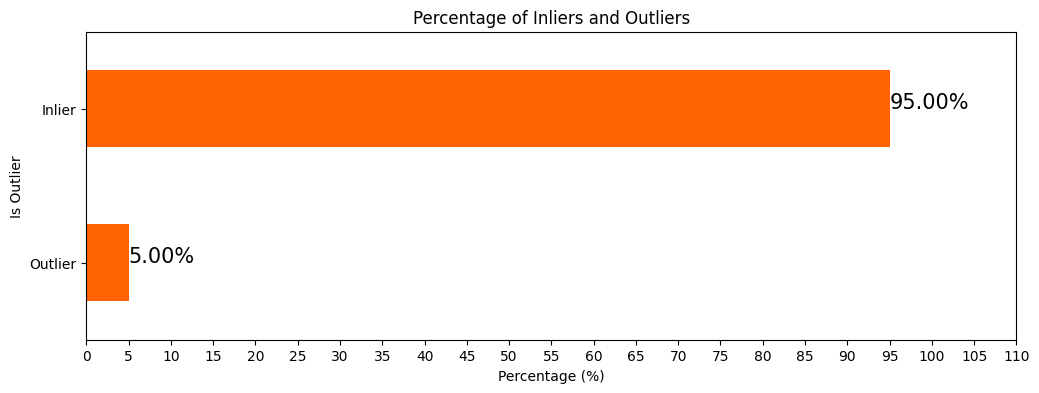

In [99]:
# Calculate the percentage of inliers and outliers
outlier_percentage = rfm['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [100]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season,Outlier_Scores,Is_Outlier
Customer_ID,,,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring,1,Inlier
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer,1,Inlier
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter,1,Inlier
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall,1,Inlier
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring,1,Inlier


In [101]:
transformed_df.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour
0,0.107140,-0.924867,-1.090875,-0.017356,-0.859530,2.786185,1.507722,0.146747,-0.967907,-0.959583,-0.136145,-0.617550,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [102]:
rfm.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Age,Gender,Category_Diversity,Favorite_Category,Total_Return,Return_Rate,Favorite_Hour,Favorite_Day,Favorite_Season,Outlier_Scores,Is_Outlier
Customer_ID,,,,,,,,,,,,,,,,,
1,397,3,6290,15,2096.666667,5.00,67,Female,3,Books,1.0,0.066667,6,1,Spring,1,Inlier
2,181,6,16481,18,2746.833333,3.00,42,Female,4,Electronics,4.0,0.222222,2,0,Summer,1,Inlier
3,331,4,9423,15,2355.750000,3.75,31,Male,3,Electronics,2.0,0.133333,0,6,Winter,1,Inlier
4,550,5,7826,19,1565.200000,3.80,37,Male,4,Books,3.0,0.157895,1,2,Fall,1,Inlier
5,533,5,9769,13,1953.800000,2.60,24,Female,2,Home,3.0,0.230769,4,2,Spring,1,Inlier


In [103]:
transformed_df['Outlier_Scores'] = rfm['Outlier_Scores']

In [104]:
transformed_df['Is_Outlier'] = rfm['Is_Outlier']

In [105]:
# Remove the outliers from the main dataset
transformed_df_cleaned = transformed_df[transformed_df['Is_Outlier'] == 'Inlier']

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
transformed_df_cleaned = transformed_df_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

In [106]:
transformed_df_cleaned

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,-0.492529,1.803178,1.718992,1.619457,0.133944,-0.006216,-0.639918,1.292595,1.579342,0.053888,0.179300,1.442409,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,-0.930124,0.439156,1.178396,0.937452,1.223311,0.924584,1.052162,1.292595,0.305718,-0.363593,-0.136145,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49656,0.394818,0.893830,1.514323,1.346655,0.963029,0.791613,0.075962,0.146747,0.305718,-0.503521,1.125636,-1.132540,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49657,0.512321,-1.379541,-1.175444,-0.972164,0.177118,1.389984,1.377562,-0.999101,-1.604719,-1.529660,0.810191,0.412429,1.0,1.0,0.0,0.0,0.0,1.0,0.0
49658,-1.007109,2.257852,0.994723,2.028661,-0.923838,-0.006216,-0.835158,0.146747,2.216154,0.180572,0.494746,1.957399,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Determining MultiCollinearity

In [107]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

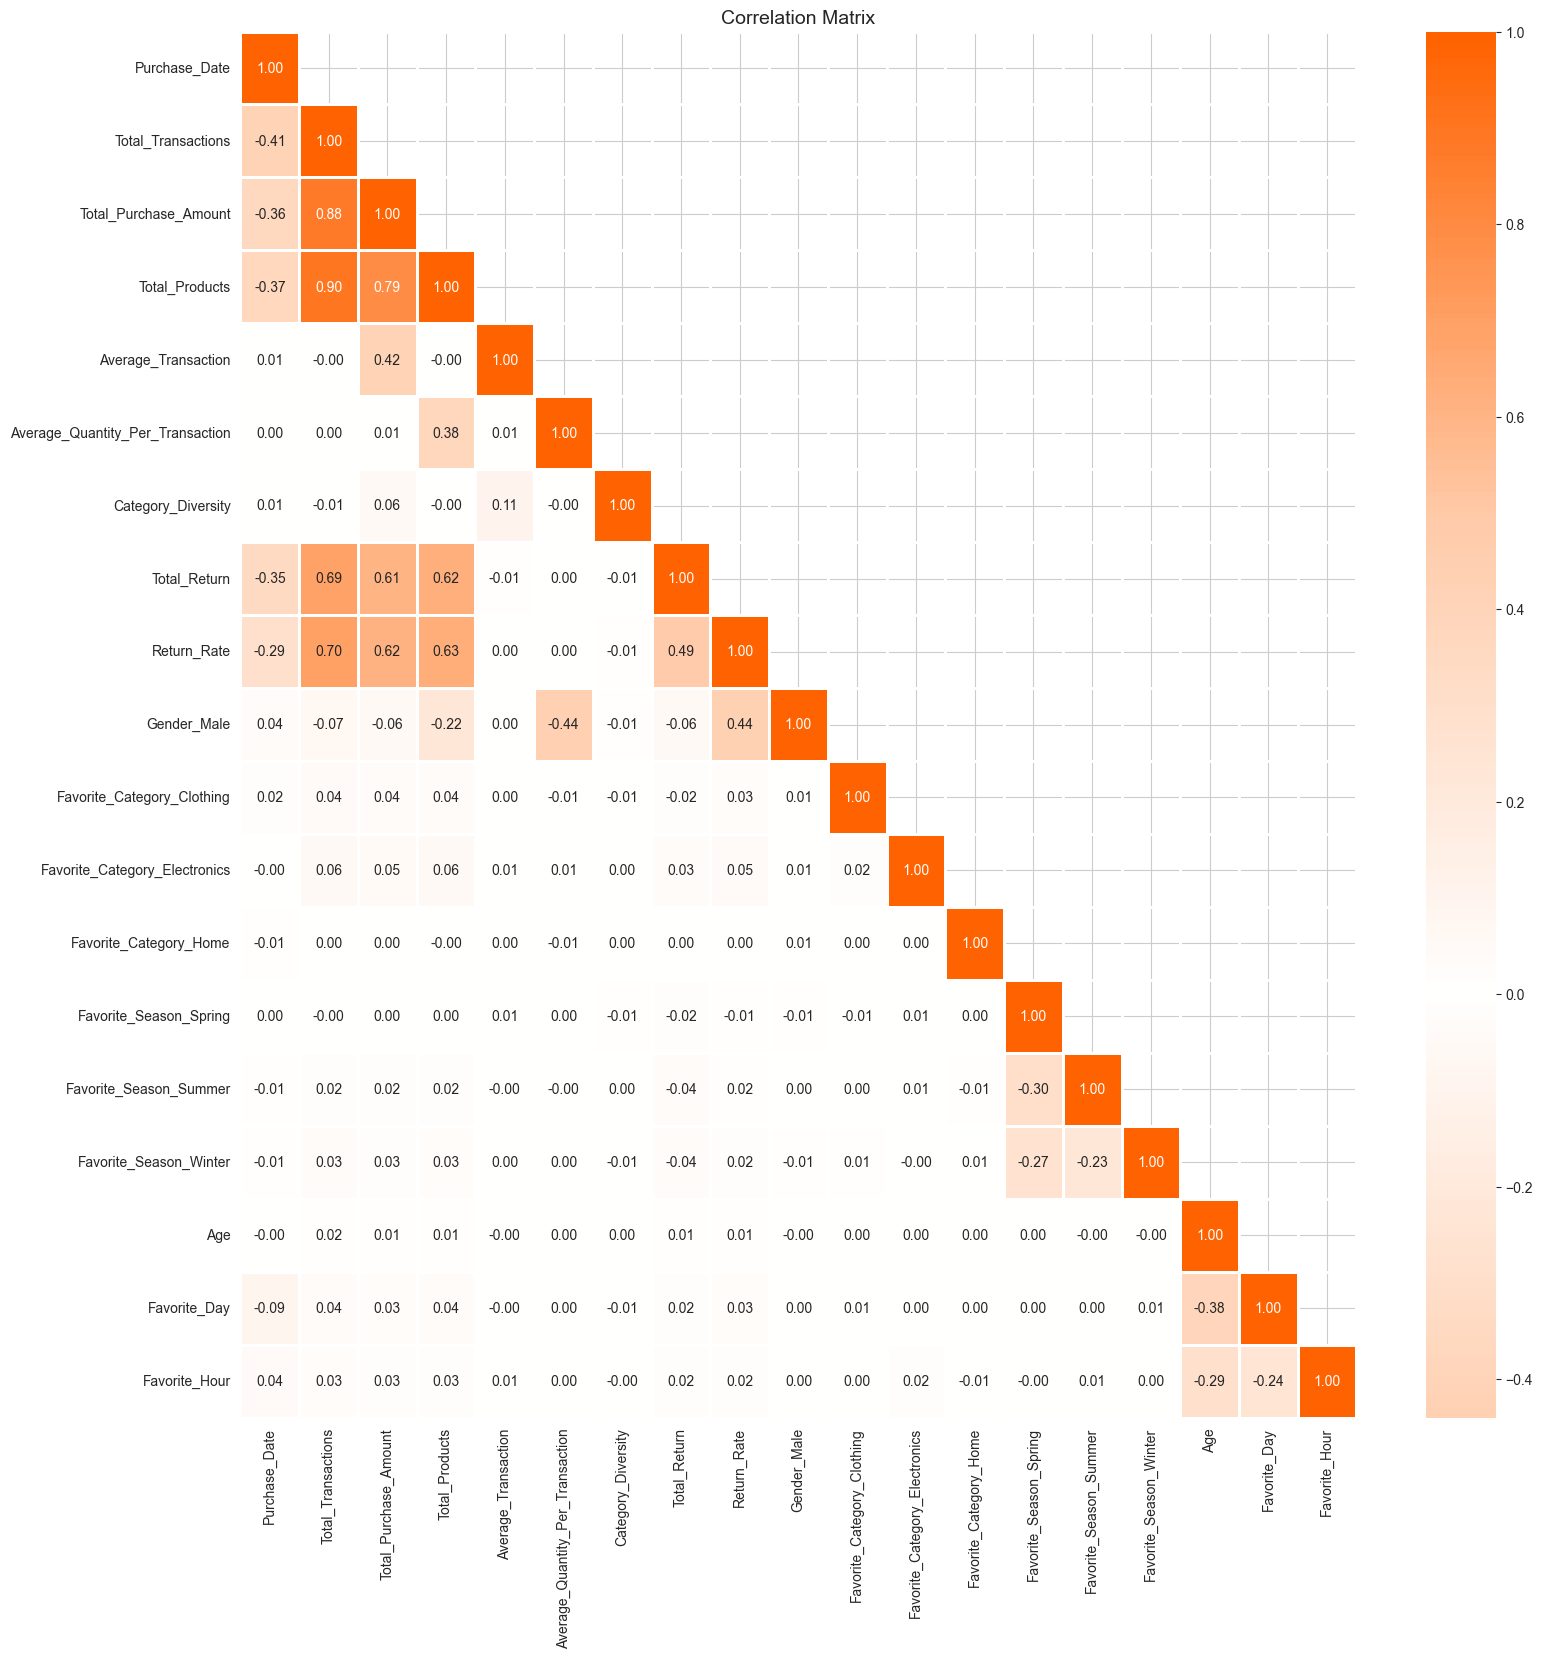

In [108]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = transformed_df_cleaned.corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

# Relations to note

1) Total_Transactions and Total_Purchase_Amount
2) Total_Transactions and Total_Products
3) Total_Purchase_Amount and Total_Products

In [109]:
transformed_df_cleaned.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,-0.492529,1.803178,1.718992,1.619457,0.133944,-0.006216,-0.639918,1.292595,1.579342,0.053888,0.179300,1.442409,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Dimensionality Reduction

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [111]:
#Get list of Numerical variables
s = (transformed_df_cleaned.select_dtypes(include='number'))

print("Numerical variables in the dataset:", list(s.columns))

Numerical variables in the dataset: ['Purchase_Date', 'Total_Transactions', 'Total_Purchase_Amount', 'Total_Products', 'Average_Transaction', 'Average_Quantity_Per_Transaction', 'Category_Diversity', 'Total_Return', 'Return_Rate', 'Gender_Male', 'Favorite_Category_Clothing', 'Favorite_Category_Electronics', 'Favorite_Category_Home', 'Favorite_Season_Spring', 'Favorite_Season_Summer', 'Favorite_Season_Winter', 'Age', 'Favorite_Day', 'Favorite_Hour']


In [112]:
# Apply PCA
pca = PCA().fit(transformed_df_cleaned)

In [113]:
# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

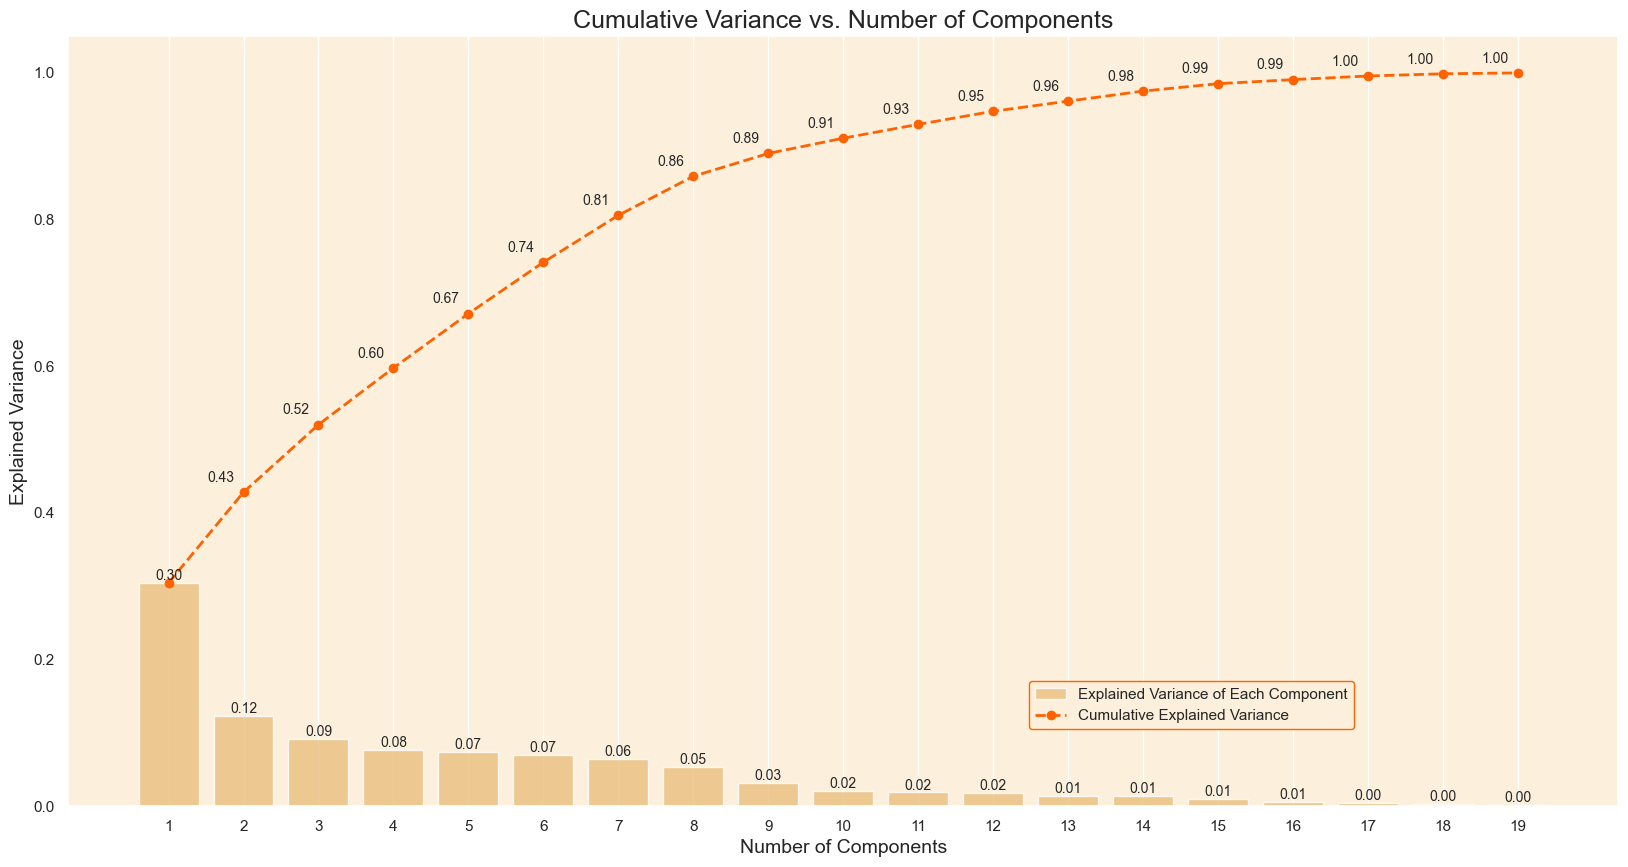

In [114]:
# Set the optimal k value (based on our analysis, we can choose 6)
# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

# Choosing PCA amount

In [115]:
# Creating a PCA object with 7 components
pca = PCA(n_components=7)

In [116]:
# Fitting and transforming the original data to the new PCA dataframe
rfm_pca = pca.fit_transform(transformed_df_cleaned)

In [117]:
# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
rfm_pca = pd.DataFrame(rfm_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

In [118]:
rfm_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.560883,0.493173,-0.366043,-1.424442,-0.454359,-0.072380,0.100500
1,-0.456746,-1.017802,-0.977732,0.402906,2.201265,-0.544176,0.103309
2,0.217643,-0.857354,-1.919715,-0.573720,0.532856,0.396984,1.152813
3,-0.958039,0.763244,-1.447604,-0.074453,0.117310,-0.711443,0.602226
4,3.637656,0.303812,-0.282435,1.010940,0.935264,-0.570182,0.086247
...,...,...,...,...,...,...,...
46857,2.117895,-0.863170,1.370682,-1.057877,-0.808216,0.387839,-0.048833
46858,1.880861,-0.953812,1.065965,0.391609,-1.663750,-0.352294,0.701277
46859,-2.583674,-2.264681,0.976687,0.811703,-0.016141,1.157501,-0.262290
46860,3.618616,0.496395,-1.498688,1.616226,1.146465,-0.057911,0.140854


In [119]:
transformed_df_cleaned.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,-0.492529,1.803178,1.718992,1.619457,0.133944,-0.006216,-0.639918,1.292595,1.579342,0.053888,0.179300,1.442409,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [120]:
rfm_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.560883,0.493173,-0.366043,-1.424442,-0.454359,-0.072380,0.100500
1,-0.456746,-1.017802,-0.977732,0.402906,2.201265,-0.544176,0.103309
2,0.217643,-0.857354,-1.919715,-0.573720,0.532856,0.396984,1.152813
3,-0.958039,0.763244,-1.447604,-0.074453,0.117310,-0.711443,0.602226
4,3.637656,0.303812,-0.282435,1.010940,0.935264,-0.570182,0.086247


In [121]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=transformed_df_cleaned.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Purchase_Date,-0.253678,-0.010147,0.123147,0.203418,0.001094,-0.064905,0.639166
Total_Transactions,0.475416,0.018255,-0.068556,0.011853,-0.014426,0.026704,-0.026324
Total_Purchase_Amount,0.449590,0.021074,0.292290,0.006761,-0.025447,-0.156581,-0.023836
Total_Products,0.456876,-0.213438,-0.082339,0.040505,-0.012817,0.039263,0.173060
Average_Transaction,0.059814,0.013312,0.795586,-0.004250,-0.030078,-0.435384,0.000893
Average_Quantity_Per_Transaction,0.061338,-0.603157,-0.048741,0.072971,0.003008,0.033710,0.486590
Category_Diversity,0.006849,-0.006995,0.477852,-0.105605,0.070749,0.868781,0.012978
Total_Return,0.381574,0.010022,-0.105095,-0.083188,0.023726,0.040939,-0.151801
Return_Rate,0.379076,0.318293,-0.103960,0.048691,-0.005295,0.063149,0.389669
Gender_Male,-0.017361,0.698346,-0.034944,0.028146,0.007332,0.028476,0.314888


# Elbow Method

In [122]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from collections import Counter

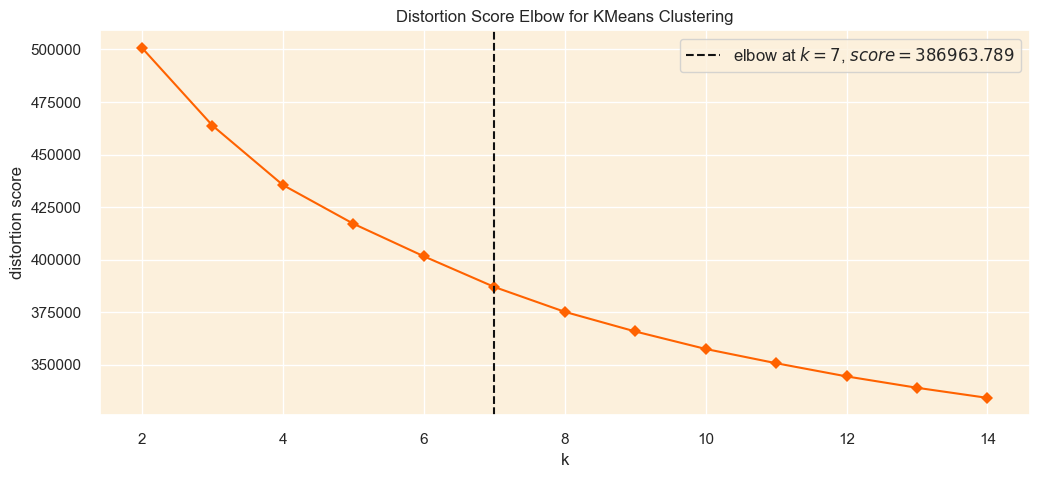

In [123]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
visualizer.fit(transformed_df_cleaned)

# Finalize and render the figure
visualizer.show();

# Silhoutte Method

In [124]:
import matplotlib.gridspec as gridspec

In [125]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

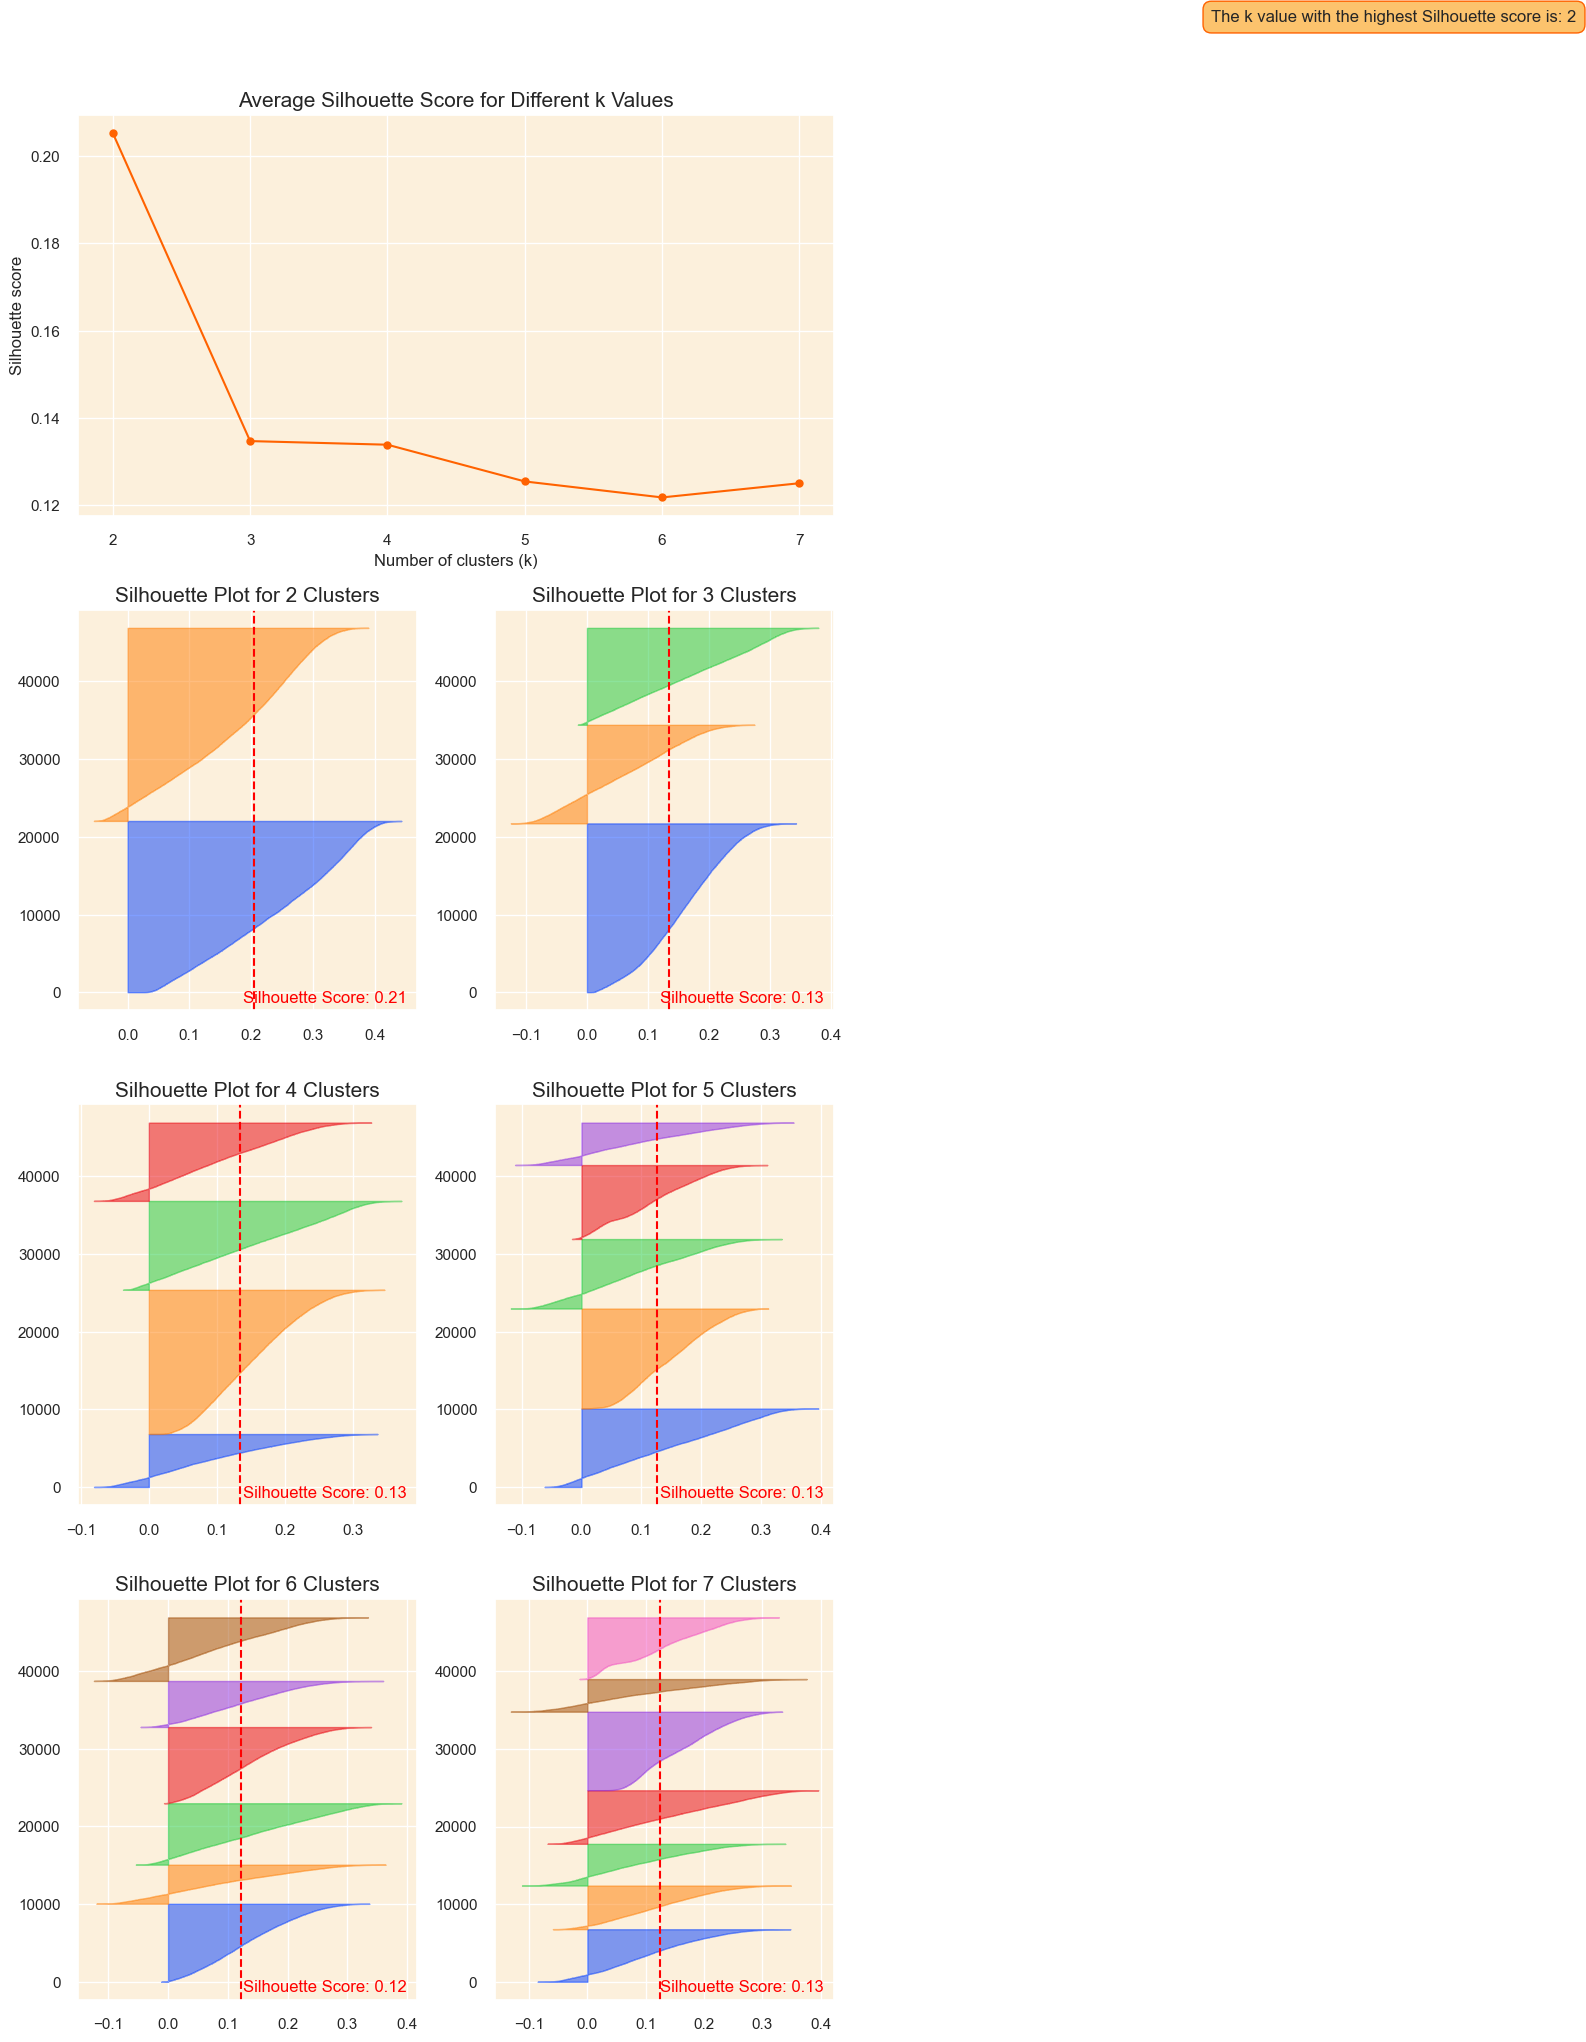

In [126]:
silhouette_analysis(rfm_pca, 2, 7, figsize=(20, 30))

In [127]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(transformed_df_cleaned)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

In [128]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [129]:
cluster_frequencies.most_common()

[(np.int32(1), 24940), (np.int32(0), 21922)]

In [130]:
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

In [131]:
label_mapping

{np.int32(1): 0, np.int32(0): 1}

In [132]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [134]:
# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {1: 0, 0: 1}.items()}

In [135]:
# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
transformed_df_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
rfm_pca['cluster'] = new_labels

In [136]:
transformed_df_cleaned

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour,cluster
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
5,-0.492529,1.803178,1.718992,1.619457,0.133944,-0.006216,-0.639918,1.292595,1.579342,0.053888,0.179300,1.442409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49655,-0.930124,0.439156,1.178396,0.937452,1.223311,0.924584,1.052162,1.292595,0.305718,-0.363593,-0.136145,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
49656,0.394818,0.893830,1.514323,1.346655,0.963029,0.791613,0.075962,0.146747,0.305718,-0.503521,1.125636,-1.132540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49657,0.512321,-1.379541,-1.175444,-0.972164,0.177118,1.389984,1.377562,-0.999101,-1.604719,-1.529660,0.810191,0.412429,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
49658,-1.007109,2.257852,0.994723,2.028661,-0.923838,-0.006216,-0.835158,0.146747,2.216154,0.180572,0.494746,1.957399,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [137]:
colors = sns.color_palette("deep", n_colors=2)

C:\Users\brian\AppData\Local\Temp\ipykernel_10656\3565418606.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors, hue='Cluster', legend=False)


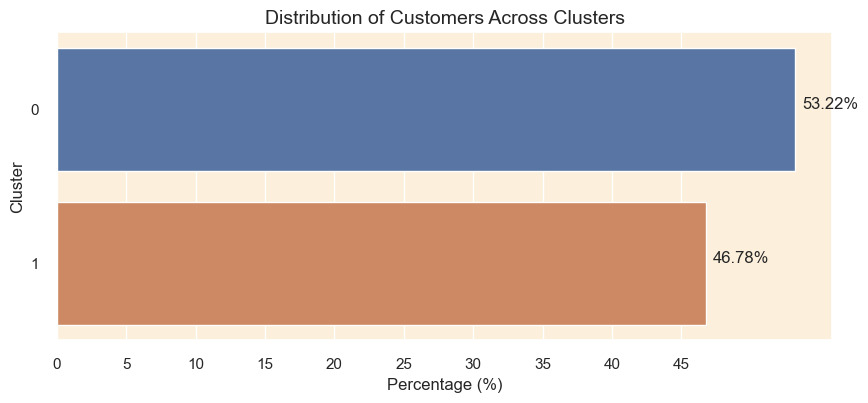

In [138]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (rfm_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors, hue='Cluster', legend=False)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [139]:
from tabulate import tabulate

In [140]:
# Compute number of customers
num_observations = len(rfm_pca)

# Separate the features and the cluster labels
X = rfm_pca.drop('cluster', axis=1)
clusters = rfm_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        46862        |
|    Silhouette Score     | 0.20510671991363183 |
| Calinski Harabasz Score | 15007.420975858586  |
|  Davies Bouldin Score   | 1.6801126746929693  |
+-------------------------+---------------------+


In [141]:
transformed_df_cleaned.head()

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour,cluster
1,-0.768052,0.439156,0.405382,0.391847,0.026916,-0.006216,-0.119278,1.292595,0.942530,0.370598,-0.767036,-1.132540,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,-0.160280,-0.470193,-0.630884,-0.017356,-0.506293,1.040934,-0.835158,0.146747,-0.331095,-0.389505,-1.082481,1.957399,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.727067,-0.015519,-0.865357,0.528248,-1.584139,1.110744,-0.444678,1.292595,0.305718,-0.179477,-0.924758,-0.102560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.658186,-0.015519,-0.580084,-0.290158,-1.054317,-0.564696,-1.290718,-0.999101,0.305718,0.443685,-0.451590,-0.102560,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
5,-0.492529,1.803178,1.718992,1.619457,0.133944,-0.006216,-0.639918,1.292595,1.579342,0.053888,0.179300,1.442409,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [142]:
cluster_centroids = transformed_df_cleaned.groupby('cluster').mean()

In [143]:
cluster_centroids

,Purchase_Date,Total_Transactions,Total_Purchase_Amount,Total_Products,Average_Transaction,Average_Quantity_Per_Transaction,Category_Diversity,Total_Return,Return_Rate,Gender_Male,Favorite_Category_Clothing,Favorite_Category_Electronics,Favorite_Category_Home,Favorite_Season_Spring,Favorite_Season_Summer,Favorite_Season_Winter,Age,Favorite_Day,Favorite_Hour
cluster,,,,,,,,,,,,,,,,,,,
0,0.340270,-0.719626,-0.680599,-0.687937,-0.087788,-0.080277,-0.012540,-0.590519,-0.576244,0.009980,-0.074801,-0.095127,0.503408,0.263753,0.198156,0.160385,0.302767,0.225060,0.150601
1,-0.388049,0.819122,0.774488,0.784332,0.098560,0.093110,0.012922,0.671531,0.658169,-0.008913,0.088668,0.105813,0.502053,0.266353,0.211523,0.172338,0.324058,0.256683,0.160569


In [144]:
# Function to create a radar chart
def create_radar_chart(ax, angles, data, colors, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

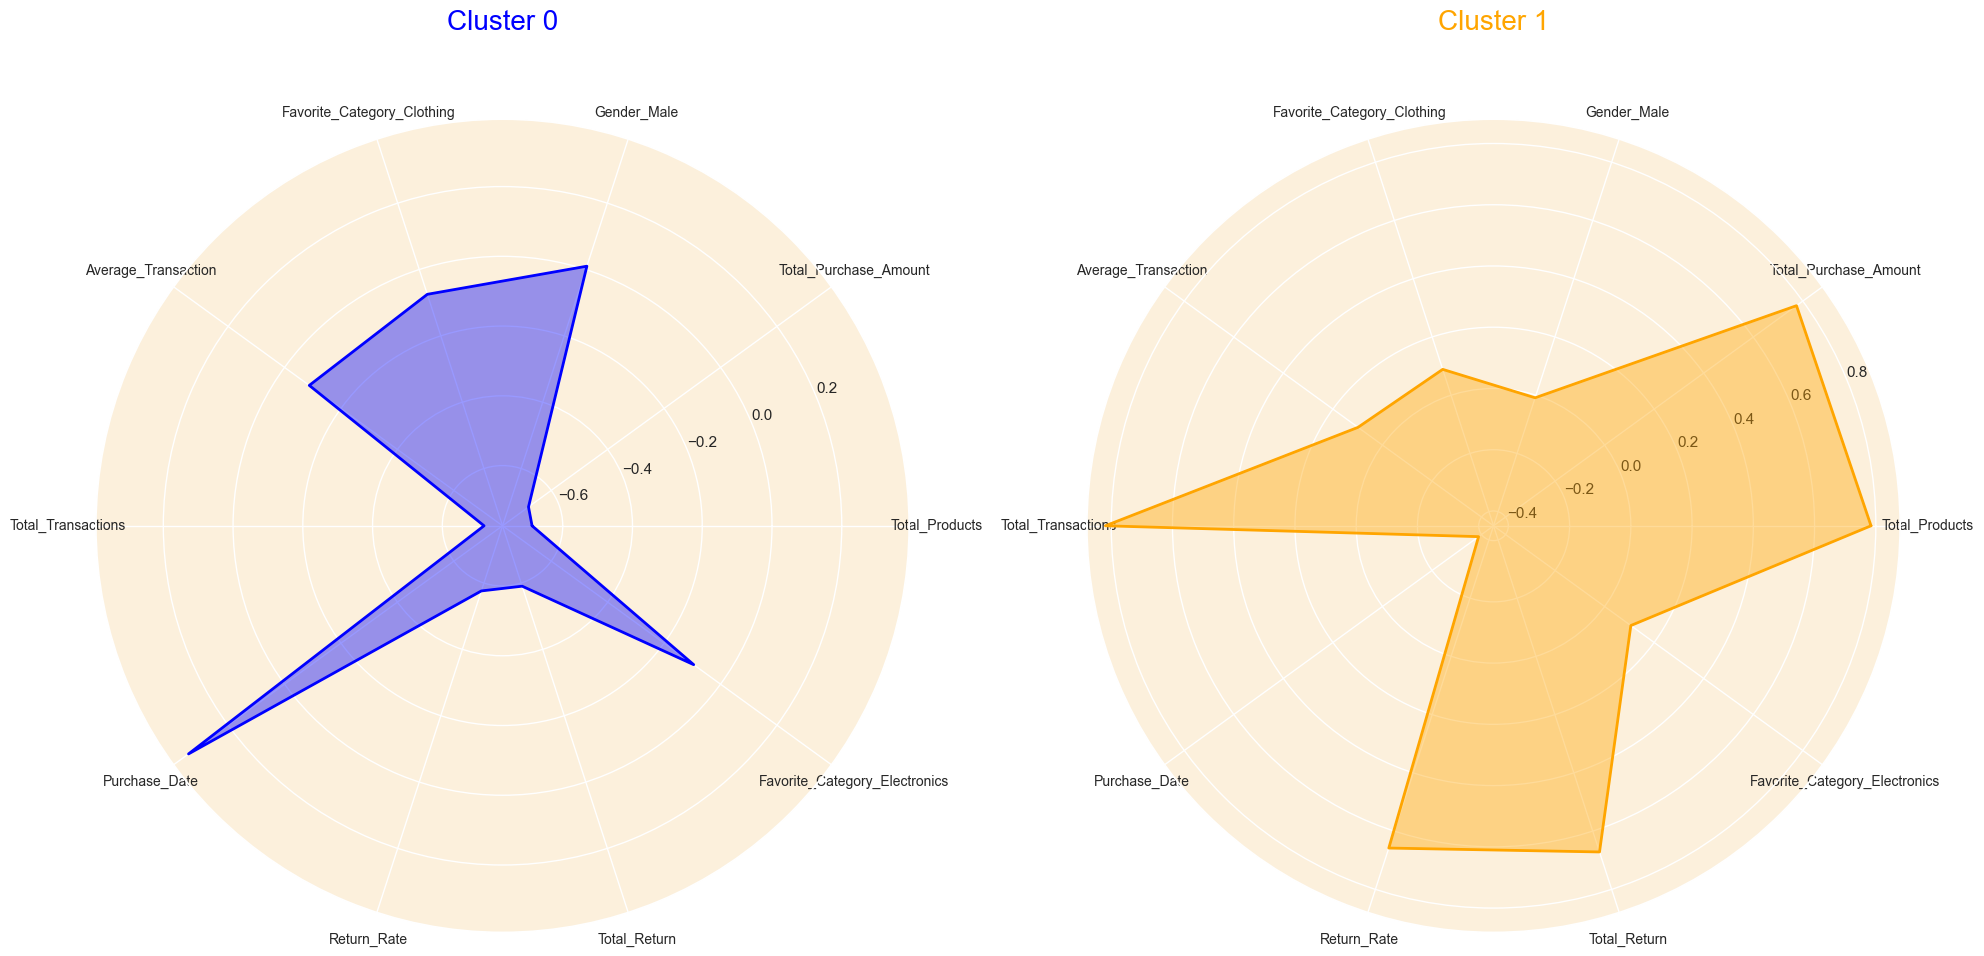

In [146]:
# Number of features to display
top_n_features = 10

# Calculate the variance of each feature
feature_variances = transformed_df_cleaned.drop(columns=['cluster'], axis=1).var()

# Select the top N features with the highest variance
top_features = feature_variances.nlargest(top_n_features).index.tolist()

# Filter the cluster centroids to only include the top N features
cluster_centroids_filtered = cluster_centroids[top_features]

# Update the labels and angles for the radar chart
labels = np.array(cluster_centroids_filtered.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))  # Close the loop
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=len(cluster_centroids_filtered))

# Colors for each cluster
colors = ['blue', 'orange', 'green', 'red', 'purple'][:len(cluster_centroids_filtered)]

# Create radar charts for each cluster
for i, (cluster, color) in enumerate(zip(cluster_centroids_filtered.index, colors)):
    data = cluster_centroids_filtered.loc[cluster].tolist()
    data += data[:1]  # Close the loop
    create_radar_chart(ax[i], angles, data, color, cluster)
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Cluster Interpretation

### Cluster 0

* Customers in cluster 0 are usually males whose favorite shopping category are usually electronics or clothing.
* They have a moderate average transaction, meaning that are each transaction they spend an average amount.
* These customers have not made any purchases in a while shown in the high purchase_date

### Cluster 1

* The customers in cluster 1 are usually females.
* These customers have purchased the most amount of items shown in the high total transaction, total purchase amount, and total products.
* These customers have made purchases recently as shown in the low purchase_date.
* These customers also have a high return rate and total return.